In [1]:
from IPython.display import Image

# 5 차원 축소를 사용한 데이터 압축

# 5.1 주성분 분석을 통한 비지도 차원 축소
* 특성 선택
    * ex) 순차 후진 선택
    * 원본 특성 유지
* 특성 추출
    * 새로운 특성 공간으로 데이터 변환 또는 투영
    * 대부분의 관련 있는 정보를 유지하면서 데이터 압축
    * 저장 공간 절약, 계산 효율성 향상, 차원의 저주 문제 감소 => 예측 성능 향상
        * 특히 규제가 없는 모델로 작업할 시 더욱 좋음

### 5.1.1 주성분 분석의 주요 단계
* PCA - 비지도 선형 변환 기법
    * 탐색적 데이터 분석, 주식 거래 시장의 잡음 제거, 생물정보학 분야에서 게놈 데이터나 유전자 발현 분석 등
    * 특성 사이의 상관관계를 기반으로 하여 데이터에 있는 어떤 패턴을 찾을 수 있음.
        * 고차원 데이터에서 분산이 가장 큰 방향으로 찾고 좀 더 작거나 같은 수의 치원을 갖는 새로운 부분 공간으로 이를 투영.
        * 새로운 부분 공간의 직교 좌표(주성분)는 주어진 조건하에서 분산이 최대인 방향으로 해석
        

In [2]:
# 원본 특성에서 찾는 주성분
Image(url='https://git.io/JtsvW', width=400) 

$x_{1}$과 $x_{2}$는 원본 특성 축이고 PC1과 PC2는 주성분이다.

PCA 차원 축소를 하기 위해 $d * k$ 차원의 변환 행렬 $W$를 만든다. 이 행렬로 훈련 샘플의 특성 벡터 $x$를 새로운 $k$ 차원의 특성 부분 공간으로 매핑. 이 부분 공간은 원본 $d$차원의 특성 공간보다 작은 차원을 가진다.

$\boldsymbol{x}\boldsymbol{W}=\boldsymbol{z}$

원본 d 차원 데이터를 새로운 k 차원의 부분 공간으로 변환하여 만들어진 첫 번째 주성분이 가장 큰 분산을 가진다. 모든 주성분은 다른 주성분과 상관관계가 없다는(직교한다는) 제약하에 가장 큰 분산을 가진다. 입력 특성에 상관관계가 있더라도 주성분은 서로 직교할 것이다.

PCA 방향은 데이터 스케일에 매우 민감하다. 특성의 스케일이 다르고 모든 특성의 중요도를 동일하게 취급하기 위해 PCA 적용전 특성을 **표준화 처리**해야한다.

* PCA 단계
    1. d 차원 데이터셋을 표준화 전처리한다.
    2. 공분산 행렬을 만든다
    3. 공분산 행렬을 고유 벡터와 고윳값으로 분해
    4. 고유값을 내림차순으로 정렬하고 그에 해당하는 고유 벡터의 순위를 매김
    5. 고유값이 가장 큰 k개의 고유 벡터 선택. k는 새로운 특성 부분 공간의 차원
    6. 최상위 k개의 고유 벡터로 투영 행렬 W를 만듬
    7. 투영 행렬 W를 사용해 d 차원 입력 데이터셋 X를 새로운 k 차원의 특성 부분 공간으로 변환

### 5.1.2 주성분 추출 단계

In [3]:
import pandas as pd

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
from sklearn.model_selection import train_test_split
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

# 1. 특성 표준화
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
# 2. 공분산 행렬의 고유값 분해
import numpy as np
cov_mat = np.cov(X_train_std.T) # np.cov()를 사용하여 표준화 전처리된 훈련 데이터셋의 공분산 행렬 계산
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat) # np.linalg.eig()를 사용하여 고유값 분해 수행
# eigen_vals : 13개의 고유값이 들어 있는 벡터
# eigen_vecs : 각 고유값에에 대응하는 고유 벡터가 열에 저장된 13 X 31 차원 행렬
print('고윳값 :', eigen_vals)

고윳값 : [4.84274532 2.41602459 1.54845825 0.96120438 0.84166161 0.6620634
 0.51828472 0.34650377 0.3131368  0.10754642 0.21357215 0.15362835
 0.1808613 ]


* 고윳값 분해 - 넘파이
    * numpy.linalg.eig 함수를 사용해 대칭 공분산 행렬을 고유값과 고유벡터로 분해.
    * 최적은 아님. 에르미트(Hermetian) 행렬을 위해서 설계된 `numpy.linalg.eigh`를 사용하는 것이 더 좋다. 이 함수는 항상 실수 고윳값을 반환.

### 5.1.3 총 분산과 설명된 분산
* 데이터셋 차원을 새로운 특성 부분 공간으로 압축하여 줄여야 하기에 가장 많은 정보(분산)를 가진 고유 벡터(주성분) 일부만 선택.
* 고유값은 고유 벡터의 크기를 결정하므로 고유값을 내림차순으로 형렬하여 최상위 k개의 고유벡터 선택.

In [6]:
tot = sum(eigen_vals) # 전제 고윳값 합
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)] # 설명된 분산 비율
cum_var_exp = np.cumsum(var_exp) # 분산의 누적합

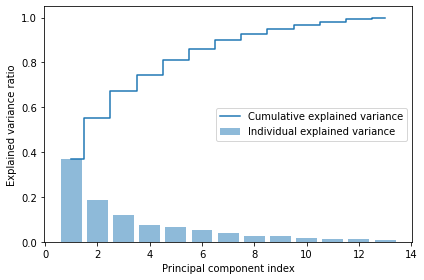

In [7]:
import matplotlib.pyplot as plt

plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

### 5.1.4 특성 변환
고유값의 내림차순으로 고유 벡터를 정렬하고 선택된 고유 벡터로 투영 행렬을 구성한다. 이 투영 행렬을 사용하여 데이터를 저차원 부분 공간으로 변환.

In [8]:
# (고유값, 고유 벡터) 튜플의 리스트를 만든다
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
# 높은 값에서 낮은 값으로 (고유값, 고유 벡터) 튜플을 정렬
eigen_pairs.sort(key=lambda k:k[0], reverse=True)

In [9]:
# 가장 큰 두 개의 고유값에 해당하는 고유 벡터 선택
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('투영 행렬 W\n', w)

투영 행렬 W
 [[-0.13724218  0.50303478]
 [ 0.24724326  0.16487119]
 [-0.02545159  0.24456476]
 [ 0.20694508 -0.11352904]
 [-0.15436582  0.28974518]
 [-0.39376952  0.05080104]
 [-0.41735106 -0.02287338]
 [ 0.30572896  0.09048885]
 [-0.30668347  0.00835233]
 [ 0.07554066  0.54977581]
 [-0.32613263 -0.20716433]
 [-0.36861022 -0.24902536]
 [-0.29669651  0.38022942]]


* 거울 투영(mirrored projection)

사용하는 Numpy와 LAPACK 버전에 따라 부호가 반대인 행렬 W를 얻을 수 있다. $v$가 행렬 $\Sigma$의 고유벡터라면 다음을 얻을 수 있다.

$\Sigma v = \lambda v,$

여기서 $\lambda$는 고윳값이다.

$$\Sigma \cdot (-v) = -\Sigma v = -\lambda v = \lambda \cdot (-v).$$이기 때문에 $-v$도 동일한 고윳값을 가진 고유벡터입니다.

In [10]:
# 투영 행렬을 사용하면 샘플x(13차원의 행 벡터)를 PCA 부분 공간(두 개의 주성분)을 투영하여 x`를 얻을 수 있다.
# 두 개의 특성으로 구성된 2차원 샘플 벡터이다.
X_train_std[0].dot(w)

array([2.38299011, 0.45458499])

In [11]:
# 전체 124 * 13 차원의 훈련 데이터셋을 행렬 점곱으로 두 개의 주성분에 투영할 수 있다
# X` = XW
X_train_pca = X_train_std.dot(w)

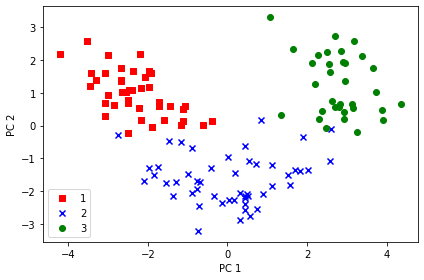

In [12]:
# 142 * 2 차원의 행렬로 변환된 Wine 훈련 데이터셋을 2차원 산점도 시각화
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train==l, 0],
                X_train_pca[y_train==l, 1],
                c=c, label=l, marker=m)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

### 5.1.5 사이킷런의 주성분 분석
* 사이킷런의 PCA 클래스
    * 훈련 데이터를 사용하여 모델을 훈련하고 같은 모델 파라미터를 사용하여 훈련 데이터셋과 테스트 데이터셋을 변환.
    * 파라미터
        * n_components : PCA로 변환할 차원의 수
사이킷런의 PCA 클래스를 Wine 데이터셋의 훈련 데이터셋에 적용하고 로지스틱 회귀로 변환된 샘플 데이터를 분류.

In [13]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    # 마커와 컬러맵을 준비
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계를 그린다
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # 클래스별로 샘플을 그린다
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.6, 
                    color=cmap(idx),
                    edgecolor=None if idx==1 else 'black',
                    marker=markers[idx], 
                    label=cl)

In [14]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

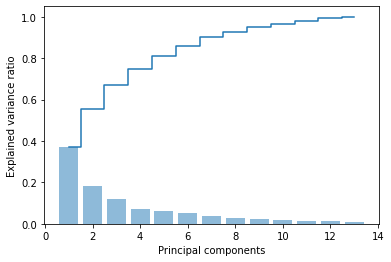

In [15]:
plt.bar(range(1, 14), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.step(range(1, 14), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')

plt.show()

* 처음 두 개의 주성분을 사용하여 로지스틱 회귀 분류기를 훈련.


In [16]:
from sklearn.linear_model import LogisticRegression

# PCA 변환기와 로지스틱 회귀 추정기를 초기화
pca = PCA(n_components=2)
lr = LogisticRegression(random_state=0)

# 차원 축소
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

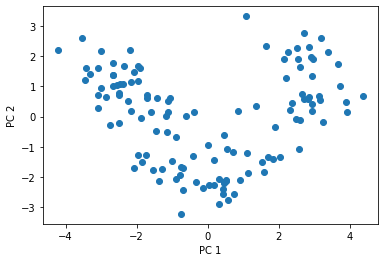

In [17]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

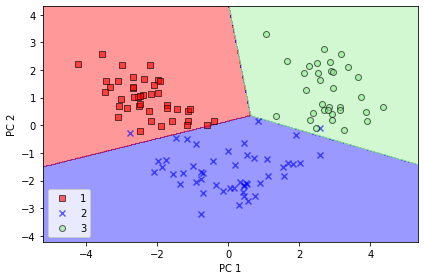

In [18]:
# 축소된 데이터셋으로 로지스틱 회귀 모델 훈련
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

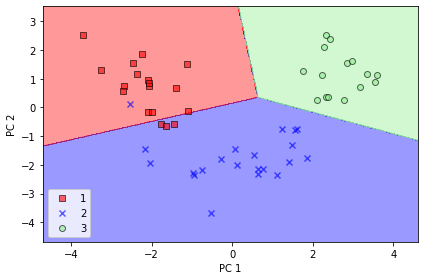

In [19]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
plt.show()

전체 주성분의 설명된 분산 비율을 알고싶다면 n_components 매개변수를 None으로 지정하고 PCA 클래스 객체를 만든다. explained_variance_ratio_ 속성에서 모든 주성분의 설명된 분산 비율을 확인할 수 있다.

In [20]:
pca = PCA(n_components=None)
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.36951469, 0.18434927, 0.11815159, 0.07334252, 0.06422108,
       0.05051724, 0.03954654, 0.02643918, 0.02389319, 0.01629614,
       0.01380021, 0.01172226, 0.00820609])

PCA 클래스의 객체를 만들 때 n_components=None이라고 지정했기 때문에 차원 축소를 수행하는 대신 분산의 크기 순서대로 모든 주성분이 반환된다.

`n_components`에 (0, 1) 사이 실수를 입력하면 설명된 분산의 비율을 나타내며 자동으로 이 비율을 달성하기 위해 필요한 주성분 개수를 선택한다.

In [21]:
pca = PCA(n_components=0.95)
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 10
설명된 분산 비율: 0.9662714406558741


n_components='mle'로 지정하면 토마스 민카(Thomas Minka)가 제안한 차원 선택 방식을 사용한다.

In [22]:
pca = PCA(n_components='mle')
pca.fit(X_train_std)
print('주성분 개수:', pca.n_components_)
print('설명된 분산 비율:', np.sum(pca.explained_variance_ratio_))

주성분 개수: 9
설명된 분산 비율: 0.9499753029186231


* `PCA` 제약
    * 배치로만 실행되기 때문에 대용량 데이터셋을 처리하려면 많은 메모리가 필요.

* `IncrementalPCA`을 사용하면 데이터셋의 일부를 사용하여 반복적으로 훈련할 수 있다.
    * `partial_fit()` 메서드 : 네트워크나 로컬 파일 시스템을부터 조금씩 데이터를 받아 훈련.
    * `fit()` 메서드 : `numpy.memmap`을 사용하여 로컬 파일로부터 데이터를 조금씩 읽어온다. 한 번에 읽어올 데이터 크기는 `IncrementalPCA` 클래스의 `batch_size`로 지정. 기본값을 특성 개수의 5배이다.
    * `n_components` 매개변수는 정수값만 입력할 수 있다.

In [23]:
from sklearn.decomposition import IncrementalPCA

ipca = IncrementalPCA(n_components=9)
for batch in range(len(X_train_std)//25+1):
    X_batch = X_train_std[batch*25:(batch+1)*25]
    ipca.partial_fit(X_batch)

print('주성분 개수:', ipca.n_components_)
print('설명된 분산 비율:', np.sum(ipca.explained_variance_ratio_))

주성분 개수: 9
설명된 분산 비율: 0.9478392700446643
